<a href="https://colab.research.google.com/github/ironcevic/modelling_week11/blob/main/Practical12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

# install quantum espresso from conda
!conda install conda-forge::qe
!pip install ase

In [ ]:
"""
About 10 min.
"""
!pw.x < si.scf.in > si.scf.out

In [106]:
!epsilon.x < si.epsilon.in > si.epsilon.out

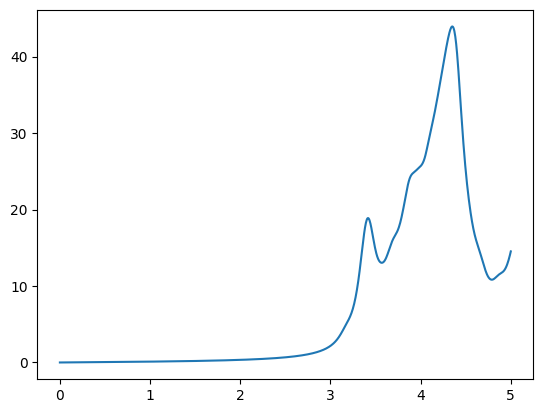

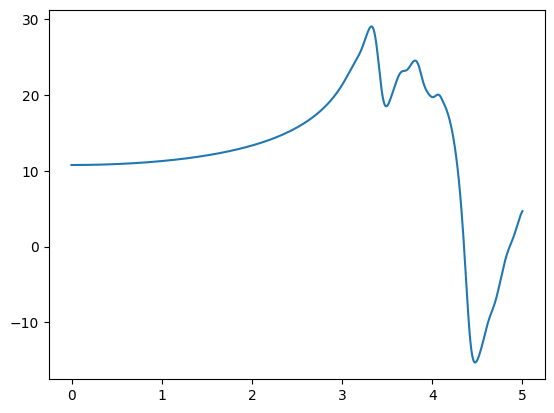

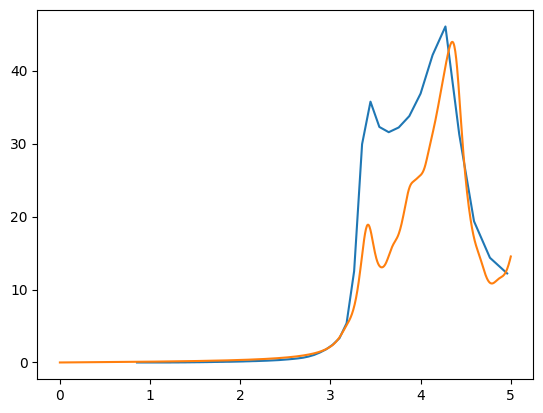

10.771981342


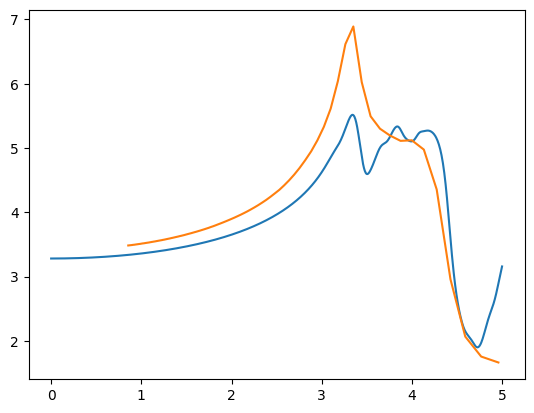

3.2820696735444237


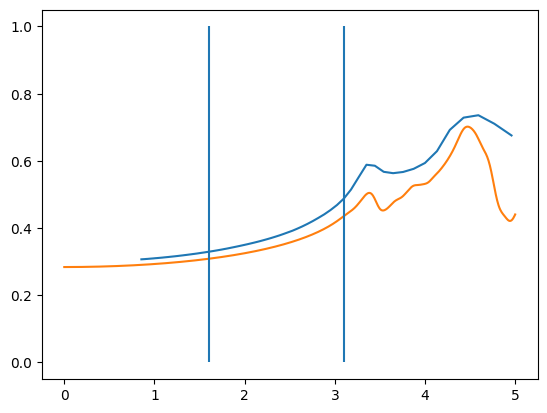

In [112]:
import numpy as np
import matplotlib.pyplot as plt
eps_2 = np.genfromtxt("epsi_silicon.dat", skip_header=2)
eps_2 = eps_2.T
plt.plot(eps_2[0], eps_2[1])
plt.show()

eps_1 = np.genfromtxt("epsr_silicon.dat", skip_header=2)
eps_1 = eps_1.T
plt.plot(eps_1[0], eps_1[1])
plt.show()

eps_exp = np.genfromtxt("si_exp.csv", skip_header=1, delimiter=",")
eps_exp = eps_exp.T
eps_exp[0] = 1.23984 / eps_exp[0]
eps_2_exp = 2 * eps_exp[1] * eps_exp[2]
plt.plot(eps_exp[0], eps_2_exp)
plt.plot(eps_2[0], eps_2[1])
plt.show()

eps_r = eps_1[1][0]
print(eps_r)

eps_mod = np.sqrt(eps_1[1]**2 + eps_2[1]**2)
n_calc = np.sqrt((eps_mod + eps_1[1])/2)
k_calc = np.sqrt((eps_mod - eps_1[1])/2)
plt.plot(eps_1[0], n_calc)
plt.plot(eps_exp[0], eps_exp[1])
plt.show()

print(n_calc[0])

# reflectance
R = ((1 - n_calc)**2 + k_calc**2)/((1 + n_calc)**2 + k_calc**2)
R_exp = ((1 - eps_exp[1])**2 + eps_exp[2]**2) / ((1 + eps_exp[1])**2 + eps_exp[2]**2)
plt.plot(eps_exp[0], R_exp)
plt.plot(eps_1[0], R)
plt.vlines(1.6, 0, 1)
plt.vlines(3.1, 0, 1)
plt.show()



In [111]:
"""
About 10 min.
"""
!pw.x < al.scf.in > al.scf.out

In [123]:
!epsilon.x < al.epsilon.in > al.epsilon.out

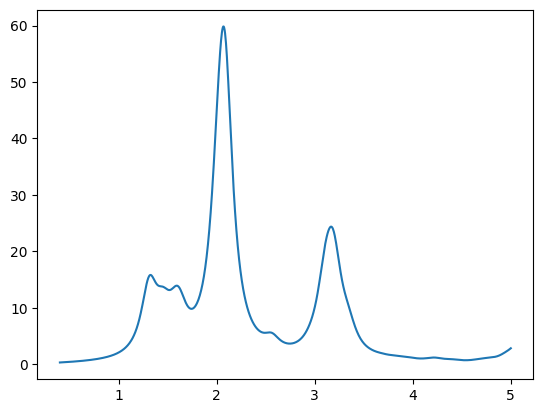

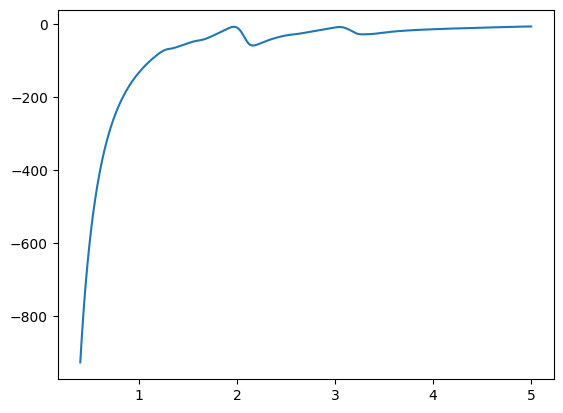

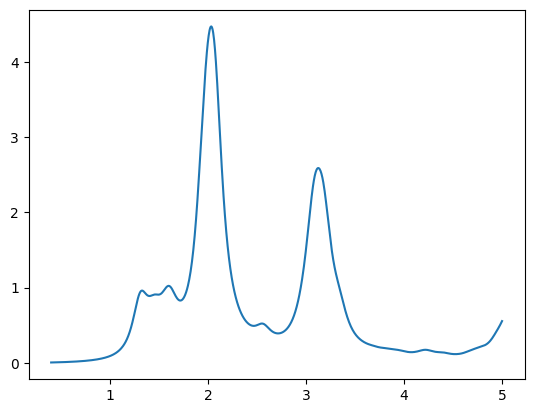

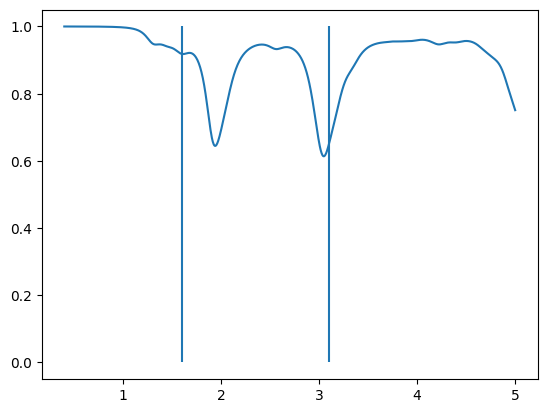

In [129]:
eps_2 = []
eps_2 = np.genfromtxt("epsi_al.dat", skip_header=2)
eps_2 = eps_2.T
plt.plot(eps_2[0], eps_2[1])
plt.show()

eps_1 = np.genfromtxt("epsr_al.dat", skip_header=2)
eps_1 = eps_1.T
plt.plot(eps_1[0], eps_1[1])
plt.show()

eps_mod = np.sqrt(eps_1[1]**2 + eps_2[1]**2)
n_calc = np.sqrt((eps_mod + eps_1[1])/2)
k_calc = np.sqrt((eps_mod - eps_1[1])/2)
plt.plot(eps_1[0], n_calc)
plt.show()

R = ((1 - n_calc)**2 + k_calc**2)/((1 + n_calc)**2 + k_calc**2)
# R_exp = ((1 - eps_exp[1])**2 + eps_exp[2]**2) / ((1 + eps_exp[1])**2 + eps_exp[2]**2)
# plt.plot(eps_exp[0], R_exp)
plt.plot(eps_1[0], R)
plt.vlines(1.6, 0, 1)
plt.vlines(3.1, 0, 1)
plt.show()